## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the ab_data.csv
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#find the number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#find the number of unique users in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#find the proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#find the number of times the new_page and treatment don't match
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
#check if any of the rows have missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#create a new dataframe, in which the landing_page and group columns match
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [79]:
#check the number of unique user_ids are in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [80]:
#find the one user_id repeated in df2
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted,ab_page,intercept


c. What is the row information for the repeat **user_id**? 

In [81]:
#retrieve the row information for the repeat user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,1,1


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [82]:
#remove the last row with a duplicate user_id, keeping the dataframe as df2
#got hint for the solution at https://knowledge.udacity.com/questions/48404
df2 = df2.drop_duplicates('user_id', keep='first')


In [83]:
#checking the duplicate row has been removed
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,1,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#proportion of individuals who converted
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#create a separate dataframe for the control group
df_c = df2.query('group == "control"')
df_c.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [19]:
#proportion of individuals from the control group who converted
df_c.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#create a separate dataframe for the treatment group
df_t = df2.query('group == "treatment"')
df_t.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [21]:
#proportion of individuals from the treatment group who converted
df_t.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
#proportion of individuals who received the new page
len(df2.query('landing_page == "new_page"'))/len(df2)

0.5000619442226688

In [84]:
#calculating the observed difference between the proportions of individuals who received the new and the old pages
obs_diff = df_t.converted.mean() - df_c.converted.mean()
obs_diff

-0.0015782389853555567

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In this sample, the control group converted rate was higher than that of the experiment group by about 0.16%. Now that we know the observed difference in this sample, we need to see if this difference is significant and is not just due to chance. Let's bootstrap this sample to simulate the sampling distribution for the difference in proportions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypotheses is that the converted rate for the old page is higher or equal to the conversion rate for the new page.
The alternative hypotheses is that the conversion rate for the new page is higher than the conversion rate for the old page.

<p>$H_{0}$: $p_{new}$ ≤ $p_{old}$ </p>
$H_{1}$: $p_{new}$ > $p_{old}$



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
#calculate the conversion rate for 𝑝𝑛𝑒𝑤  under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
#calculate the conversion rate for 𝑝𝑜𝑙𝑑  under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
# calculate the number of individuals in the treatment group
n_new = len(df_t)
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
# calculate the number of individuals in the control group
n_old = len(df_c)
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#got hint for the solution from https://knowledge.udacity.com/questions/230245
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted   

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(1, p_new, n_new)
old_page_converted   

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.00026150987543871462

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []

for _ in range(10000):
    new_page_converted_mean = np.random.binomial(1, p_new, n_new).mean()
    old_page_converted_mean = np.random.binomial(1, p_old, n_old).mean()
    p_diffs.append(new_page_converted_mean - old_page_converted_mean)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

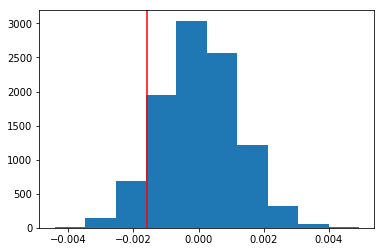

In [32]:
#convert to numpy array
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
#compute p-value
(p_diffs > obs_diff).mean()

0.9103

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


We've computed the p-value, which turned out to be approximately 9.1%. This value is pretty large, which means that the difference in conversion rates for the control and experiment groups doesn't appear to be significant. Thus, we fail to reject the null hypothesis.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df_c.converted.sum()
convert_new = df_t.converted.sum()
n_old = len(df_c)
n_new = len(df_t)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
#got hint for the solution from https://knowledge.udacity.com/questions/197523
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Using this method, we got approximately the same p-value as previously: 9.1%. Thus, once again, we don't have enough evidence to reject the null hypothesis. Z-score of -1.312 means that the observation doesn't lie far enough from the mean in terms of standard deviation, so it also proves that the null hypothesis is failed to be rejected.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should be performing logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
#create dummie variables for control and treatment groups
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [37]:
#drop the control group column
df2 = df2.drop('control', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [38]:
#rename the treatment column into ab_page
df2 = df2.rename(columns={'treatment': 'ab_page'})
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [54]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#hint from https://knowledge.udacity.com/questions/228145; 
#Without this import, I've been getting the following error: 
#AttributeError: module 'scipy.stats' has no attribute 'chisqprob'

df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:56:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [85]:
#exponentiate the results
np.exp(results.params)

intercept    0.136795
ab_page      0.985168
US           0.960062
UK           1.009932
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.19. It is different than the p-value found in Part II because the null and the alternative hypotheses associated with the regression model are the following:
<p>$H_{0}$: $β_{1}$ = 0 </p>
$H_{1}$: $β_{1}$  ≠ 0

**Sources:**
<p>1. <a href="https://knowledge.udacity.com/questions/179707#181156">Udacity Knowledgebase</a></p>
<p>2. <a href="https://stattrek.com/regression/slope-test.aspx">Hypothesis Test for Regression Slope</a></p>
<p>3. <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf">An Introduction
to Statistical Learning (p. 134)</a></p>

In Part II the hypotheses were the following:
<p>$H_{0}$: $p_{new}$ ≤ $p_{old}$ </p>
$H_{1}$: $p_{new}$ > $p_{old}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


It's a good idea to include other factors into a regression model because in real life multiple factors, not just one, are likely to have an impact on the predicted outcome. 
The disadvantages to introducing additional terms into a regression model are associated with multicollinearity, i.e. a situation when independent variables in a regression model are correlated.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [65]:
#read the countries.csv dataset
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [66]:
#check the values for the country column
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
#create dummie variables for the country column
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,country,US,UK,CA
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [68]:
#drop one of the dummie variable columns
df3 = df3.drop('CA', axis=1)
df3.head()

,user_id,country,US,UK
0,834778,UK,0,1
1,928468,US,0,0
2,822059,UK,0,1
3,711597,UK,0,1
4,710616,UK,0,1


In [73]:
#merge the two datasets on user_id
df4 = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner') 
df4.head()

,country,US,UK,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,,,
834778,UK,0,1,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,0,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,0,1,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,0,1,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,0,1,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [74]:
#drop the columns that won't be used in the regression model
df4 = df4.drop(['country', 'timestamp', 'group', 'landing_page'], axis=1)
df4.head()

,US,UK,converted,ab_page,intercept
user_id,,,,,
834778,0,1,0,0,1
928468,0,0,0,1,1
822059,0,1,1,1,1
711597,0,1,0,0,1
710616,0,1,0,1,1


In [77]:
#build the logistic regression model
logit_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        04:12:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [78]:
#exponentiate the results
np.exp(results.params)

intercept    0.136795
ab_page      0.985168
US           0.960062
UK           1.009932
dtype: float64

When we exponentiate the results, we can make the following conclusions:
1. If a user receives a new page, they're 0.99 times as likely to convert, holding all else constant.
2. If a user is in the US, they're 0.96 times as likely to convert, holding all else constant.
3. If a user is in the UK, they're 1.01 times as likely to convert, holding all else constant.

P-values, associated with each of the parameters, are greater than 0.05. Thus, we fail to reject the null hypothesis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])